In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('/content/drive/MyDrive/cardio.csv')

In [3]:
data.head(15)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474.0,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914.0,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113.0,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584.0,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668.0,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834.0,1,164,68.0,110,60,1,1,0,0,0,0


In [4]:
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431.0,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540.0,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
data.keys()

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
data.shape

(70000, 13)

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

id              0
age            99
gender          0
height          0
weight          0
ap_hi           0
ap_lo           0
cholesterol     0
gluc            0
smoke           0
alco            0
active          0
cardio          0
dtype: int64

In [9]:
# filling NaN values
data['age'].fillna(data['age'].mean(), inplace=True)

In [10]:
data = data.drop('id', axis=1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [12]:
data.max()

age            23713.0
gender             2.0
height           250.0
weight           200.0
ap_hi          16020.0
ap_lo          11000.0
cholesterol        3.0
gluc               3.0
smoke              1.0
alco               1.0
active             1.0
cardio             1.0
dtype: float64

In [13]:
data.min()

age            10798.0
gender             1.0
height            55.0
weight            10.0
ap_hi           -150.0
ap_lo            -70.0
cholesterol        1.0
gluc               1.0
smoke              0.0
alco               0.0
active             0.0
cardio             0.0
dtype: float64

In [14]:
data.mean()

age            19468.832821
gender             1.349571
height           164.359229
weight            74.205690
ap_hi            128.817286
ap_lo             96.630414
cholesterol        1.366871
gluc               1.226457
smoke              0.088129
alco               0.053771
active             0.803729
cardio             0.499700
dtype: float64

In [15]:
data.std()

age            2465.354383
gender            0.476838
height            8.210126
weight           14.395757
ap_hi           154.011419
ap_lo           188.472530
cholesterol       0.680250
gluc              0.572270
smoke             0.283484
alco              0.225568
active            0.397179
cardio            0.500003
dtype: float64

In [16]:
# find the columns with outliers value
# Select only numerical columns for outlier detection
numerical_columns = data.select_dtypes(include=[np.number])

# Create an empty list to store columns with outliers
columns_with_outliers = []

for column in numerical_columns.columns:
    # Compute Z-scores for the current column
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())

    # Define a threshold for considering an observation as an outlier (e.g., Z-score > 5)
    threshold = 5

    if any(z_scores > threshold):
        columns_with_outliers.append(column)

print("Columns with outliers:", columns_with_outliers)

Columns with outliers: ['height', 'weight', 'ap_hi', 'ap_lo']


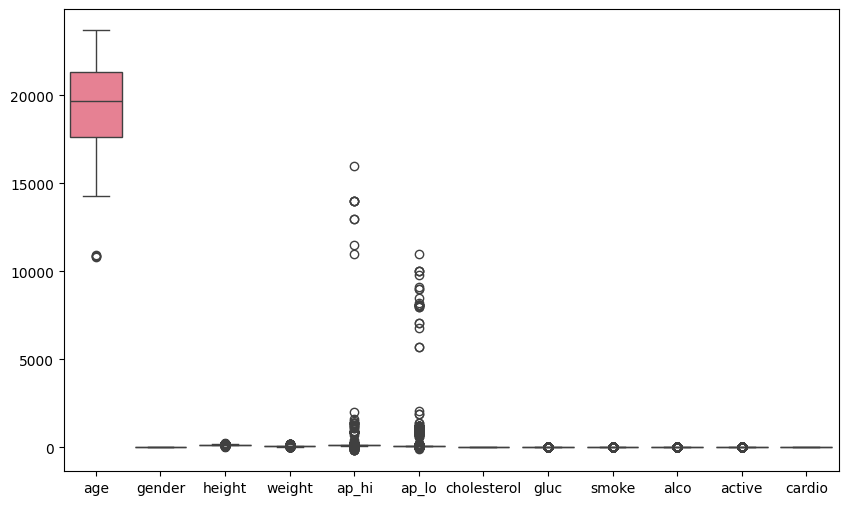

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = data, orient='v')
plt.show()

In [18]:
# removing the outiers
# Define a function to remove outliers based on IQR

def remove_outliers_iqr(df_train, column):
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_train[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply outlier removal to the dataset (df_train)
columns_with_outliers = ['height', 'weight', 'ap_hi', 'ap_lo']
for column in columns_with_outliers:
    data = remove_outliers_iqr(data, column)

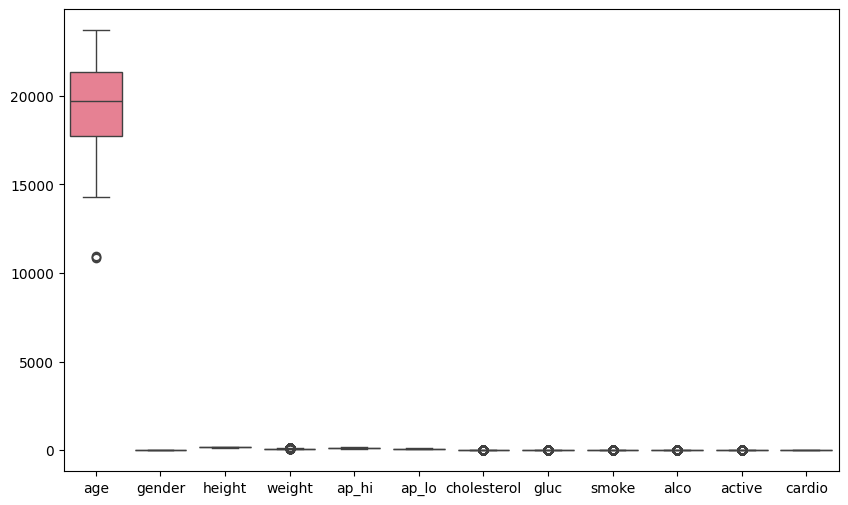

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = data, orient='v')
plt.show()

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,62505.0,19493.313702,2456.682328,10859.0,17729.0,19716.0,21339.0,23713.0
gender,62505.0,1.348564,0.476519,1.0,1.0,1.0,2.0,2.0
height,62505.0,164.406144,7.531365,143.0,159.0,165.0,170.0,186.0
weight,62505.0,73.180776,12.272097,40.0,65.0,72.0,81.0,107.0
ap_hi,62505.0,126.419870,14.289834,90.0,120.0,120.0,140.0,170.0
ap_lo,62505.0,81.698904,7.673364,65.0,80.0,80.0,90.0,105.0
cholesterol,62505.0,1.357699,0.675192,1.0,1.0,1.0,1.0,3.0
gluc,62505.0,1.220638,0.567590,1.0,1.0,1.0,1.0,3.0
smoke,62505.0,0.086345,0.280875,0.0,0.0,0.0,0.0,1.0
alco,62505.0,0.052172,0.222375,0.0,0.0,0.0,0.0,1.0


In [21]:
# Converting age from days to years

data['age'] = (data['age'] / 365).round().astype('int')

In [22]:
# we can calculate the Body Mass Index (BMI) using height and weight attributes.
# Using BMI instead of the features weight and height individually is more useful & meaningful.

data['bmi'] = data['weight']/((data['height']/100)**2)

In [23]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
5,60,1,151,67.0,120,80,2,2,0,0,0,0,29.384676


In [24]:
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
age,1.000000,-0.030825,-0.094173,0.057338,0.205040,0.147952,0.154524,0.096579,-0.047550,-0.028006,-0.010159,0.235885,0.111272
gender,-0.030825,1.000000,0.517256,0.157729,0.042262,0.047321,-0.043371,-0.025912,0.337067,0.168999,0.007302,-0.004780,-0.131933
height,-0.094173,0.517256,1.000000,0.305783,-0.010796,0.006626,-0.068190,-0.028393,0.192060,0.094082,-0.009357,-0.027595,-0.246308
weight,0.057338,0.157729,0.305783,1.000000,0.233161,0.214569,0.125409,0.086787,0.063829,0.063670,-0.013142,0.161767,0.843487
ap_hi,0.205040,0.042262,-0.010796,0.233161,1.000000,0.705637,0.192547,0.082819,0.020002,0.027620,0.002725,0.432232,0.242131
ap_lo,0.147952,0.047321,0.006626,0.214569,0.705637,1.000000,0.155805,0.063137,0.020199,0.031681,0.001384,0.336295,0.213431
cholesterol,0.154524,-0.043371,-0.068190,0.125409,0.192547,0.155805,1.000000,0.450079,0.005441,0.030853,0.009677,0.218241,0.165092
gluc,0.096579,-0.025912,-0.028393,0.086787,0.082819,0.063137,0.450079,1.000000,-0.010516,0.004753,-0.006634,0.085746,0.103608
smoke,-0.047550,0.337067,0.192060,0.063829,0.020002,0.020199,0.005441,-0.010516,1.000000,0.341812,0.027292,-0.022156,-0.043021
alco,-0.028006,0.168999,0.094082,0.063670,0.027620,0.031681,0.030853,0.004753,0.341812,1.000000,0.026860,-0.012310,0.011278


<Axes: >

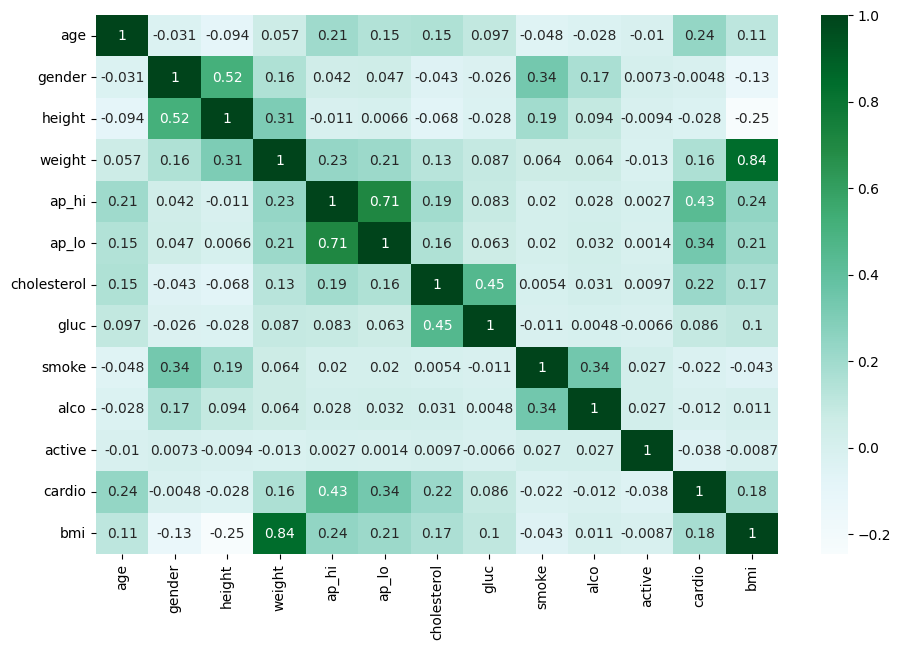

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (11, 7))
sns.heatmap(data.corr(), annot = True, cmap="BuGn")

In [26]:
# categorical data
data.value_counts('cholesterol')

cholesterol
1    47214
2     8224
3     7067
Name: count, dtype: int64

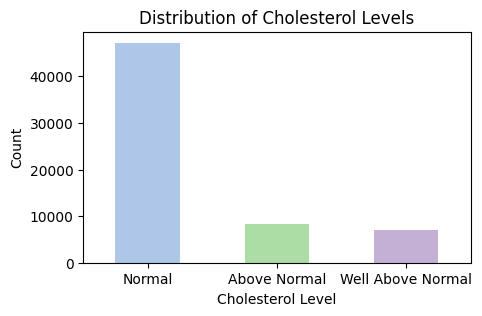

In [27]:
# Calculate the value counts
cholesterol_counts = data['cholesterol'].value_counts().sort_index()

# Map the cholesterol levels to their respective labels
cholesterol_labels = {1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'}
cholesterol_counts.index = cholesterol_counts.index.map(cholesterol_labels)

# Plot the bar chart
plt.figure(figsize=(5, 3))
cholesterol_counts.plot(kind='bar', color = ['#aec7e8', '#abdda4', '#c5b0d5'])
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

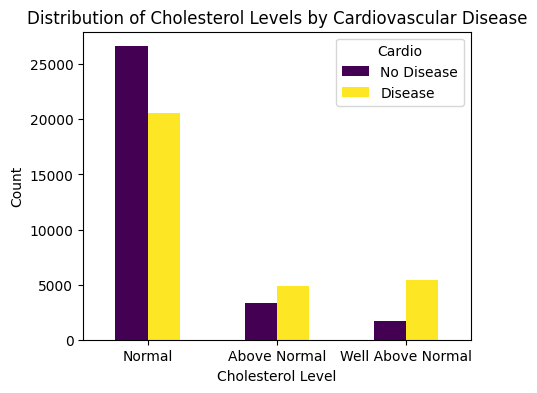

In [28]:
# Calculate the value counts for each combination of cholesterol and cardio
cholesterol_cardio_counts = data.groupby(['cholesterol', 'cardio']).size().unstack()

# Map the cholesterol levels to their respective labels
cholesterol_labels = {1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'}
cholesterol_cardio_counts.index = cholesterol_cardio_counts.index.map(cholesterol_labels)

# Plot the grouped bar chart
cholesterol_cardio_counts.plot(kind='bar', figsize=(5, 4), cmap='viridis', width=0.5)

# Adding title and labels
plt.title('Distribution of Cholesterol Levels by Cardiovascular Disease')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Cardio', labels=['No Disease', 'Disease'])
plt.show()

In [29]:
# categorical data
data.value_counts('gluc')

gluc
1    53408
3     4694
2     4403
Name: count, dtype: int64

In [30]:
data.value_counts('gender')

gender
1    40718
2    21787
Name: count, dtype: int64

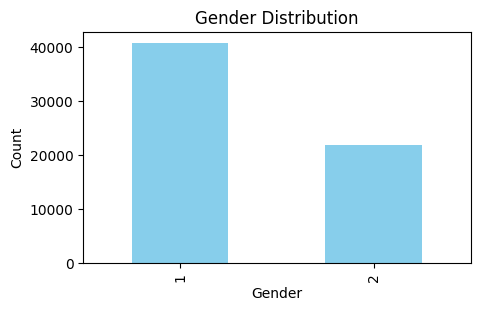

In [31]:
# Calculate gender value and plot
data['gender'].value_counts().plot(kind='bar', figsize=(5, 3), color='skyblue', title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

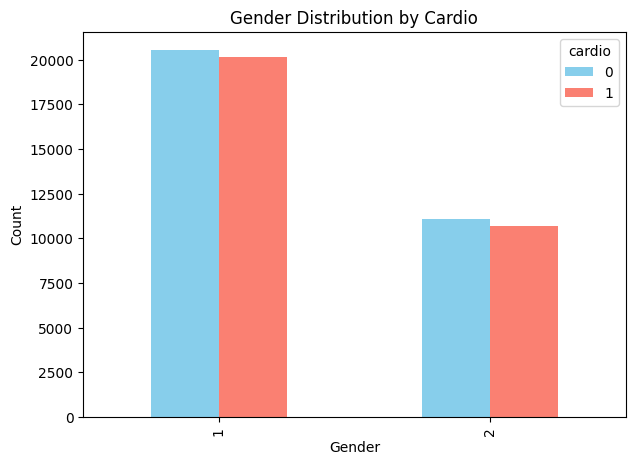

In [32]:
# Group by 'gender' and 'cardio' and count occurrences
grouped_data = data.groupby(['gender', 'cardio']).size().unstack()

# Plot the grouped bar chart
grouped_data.plot(kind='bar', figsize=(7, 5), color=['skyblue', 'salmon'], title='Gender Distribution by Cardio')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [33]:
data.value_counts('weight')

weight
65.0    3604
70.0    3522
68.0    2626
75.0    2556
60.0    2457
        ... 
76.7       1
62.7       1
75.6       1
75.2       1
70.7       1
Name: count, Length: 179, dtype: int64

In [34]:
print("cardio True : ",(data.cardio.values == 1).sum())
print("cardio False : ",(data.cardio.values == 0).sum())

cardio True :  30870
cardio False :  31635


In [35]:
df = data.copy()

In [36]:
# put categorical & numerical attributes in different variables
X_categorical = df[['gender', 'cholesterol','gluc', 'smoke', 'alco', 'active']]
X_numerical = df.drop(['gender', 'cholesterol','gluc', 'smoke', 'alco', 'active', 'cardio'], axis=1)

In [37]:
X_categorical.head()

,gender,cholesterol,gluc,smoke,alco,active
0,2,1,1,0,0,1
1,1,3,1,0,0,1
2,1,3,1,0,0,0
3,2,1,1,0,0,1
5,1,2,2,0,0,0


In [38]:
X_numerical.head()

,age,height,weight,ap_hi,ap_lo,bmi
0,50,168,62.0,110,80,21.967120
1,55,156,85.0,140,90,34.927679
2,52,165,64.0,130,70,23.507805
3,48,169,82.0,150,100,28.710479
5,60,151,67.0,120,80,29.384676


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_numerical)
X_scaled = scaler.transform(X_numerical)

X_scaled = pd.DataFrame(X_scaled, index=X_numerical.index, columns= X_numerical.columns)
X = pd.concat([X_scaled, X_categorical], axis=1)
y = df['cardio']

In [40]:
# split the dataset into training (75%) and testing (25%) set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [41]:
# Support Vector Machine
from sklearn.svm import SVC

svm_clf = SVC(random_state=0)
svm_model = svm_clf.fit(X_train, y_train)
svm_pre = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pre) * 100
svm_accuracy = "{:.2f}".format(svm_accuracy)
print("Accuracy of SVM:", svm_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, svm_pre))

Accuracy of SVM: 72.94
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      7964
           1       0.76      0.66      0.70      7663

    accuracy                           0.73     15627
   macro avg       0.73      0.73      0.73     15627
weighted avg       0.73      0.73      0.73     15627



In [ ]:
# Support vector machine
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100],
             'gamma': [0.25, 0.75, 0.5, 1],
             'kernel': ['linear', 'rbf', 'poly']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.722 total time=  52.8s
[CV 2/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.716 total time=  52.4s
[CV 3/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.727 total time=  51.0s
[CV 4/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.719 total time=  52.4s
[CV 5/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.724 total time=  52.2s
[CV 1/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.729 total time= 1.2min
[CV 2/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.721 total time= 1.2min
[CV 3/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.732 total time= 1.2min
[CV 4/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.725 total time= 1.2min
[CV 5/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.729 total time= 1.2min
[CV 1/5] END ....C=0.1, gamma=0.25, kernel=poly;, score=0.726 total time= 1.2min
[CV 2/5] END ....C=0.1, gamma=0.25, kernel=poly

In [ ]:
svm = SVC(C=0.1, gamma=0.25, kernel='poly')
svm_m = svm.fit(X_train, y_train)
svm_pred = svm_m.predict(X_test)
svm_as = accuracy_score(y_test, svm_pred) * 100
svm_as = "{:.2f}".format(svm_as)
print('Accuracy of SVM after tuning:', svm_as)

print("Classification Report:")
print(classification_report(y_test, svm_pred))

In [42]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rf_m = rfc.fit(X_train, y_train)
rf_pred = rf_m.predict(X_test)
rf_as = accuracy_score(y_test, rf_pred) * 100
rf_as = "{:.2f}".format(rf_as)
print("Accuracy of RF:", rf_as)

print("Classification Report:")
print(classification_report(y_test, rf_pred))

Accuracy of RF: 70.19
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      7964
           1       0.70      0.68      0.69      7663

    accuracy                           0.70     15627
   macro avg       0.70      0.70      0.70     15627
weighted avg       0.70      0.70      0.70     15627



In [ ]:
# Setting up the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Grid Search with cross-validation
rfc_p = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=rfc_p, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting the model
grid_search.fit(X_train, y_train)

# Finding the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Training the model with the best parameters
best_rfc = grid_search.best_estimator_
best_rfc.fit(X_train, y_train)

# Predicting on the test set
rf_pred_cv = best_rfc.predict(X_test)

# Calculating accuracy
rf_as_cv = accuracy_score(y_test, rf_pred_cv) * 100
rf_as_cv = "{:.2f}".format(rf_as_cv)
print("Accuracy of RF after tuning:", rf_as_cv)

# Printing the classification report
print("Classification Report with CV:")
print(classification_report(y_test, rf_pred_cv))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
